## Spam Text Meassege Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shirz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['Category'] = df['Category'].replace({'ham': 0, 'spam':1})

In [4]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


### Gain insight from data

In [6]:
Ham_count = (df['Category']== 0).sum()
Ham_count

4825

In [7]:
Spam_count = (df['Category']== 1 ).sum()
Spam_count

747

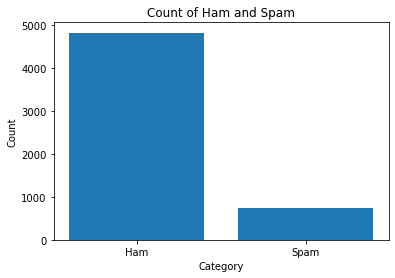

In [8]:
categories = ['Ham', 'Spam']
counts = [Ham_count, Spam_count]

plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Ham and Spam')
plt.show()


### Data Cleaning

In [9]:
stemmer = PorterStemmer()
corpus =[]

for w in range(len(df['Message'])):
    msg = df['Message'][w]
    msg = re.sub('\b[a-zA-Z]\b', ' ', msg)
    msg = msg.lower()
    msg = msg.split()
    msg = [stemmer.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    msg = ' '.join(msg)
    corpus.append(msg)

### create word Vector

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(corpus)
#print(tf.vocabulary_)

TfidfVectorizer()

In [11]:
X = tf.transform(corpus).toarray()

In [12]:
y = df['Category']

### Data Modeling(Classification)

In [13]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =101)

In [14]:
print(y_train.shape)

(4457,)


### Naive Bayes Model

In [15]:
#Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB().fit(X_train, y_train)
y_pred = NB.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[980,   0],
       [ 43,  92]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       1.00      0.68      0.81       135

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.96      1115



### SVM Model

In [18]:
#SVM model
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[978   2]
 [ 24 111]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      0.82      0.90       135

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115



### Logistic Regression Model

In [20]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf = lr_clf.fit(X_train, y_train)
y_pred1 = lr_clf.predict(X_test)

In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[978   2]
 [ 24 111]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      0.82      0.90       135

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115



### Cross Validation

In [22]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_curve, auc

# Perform k-fold cross-validation
cv_scores = cross_val_score(lr_clf, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Get predicted probabilities for each fold
y_probas_cv = cross_val_predict(lr_clf, X, y, cv=5, method='predict_proba')

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_probas_cv[:, 1])
roc_auc = auc(fpr, tpr)


Cross-validation scores: [0.95605381 0.95784753 0.9551167  0.95332136 0.95780969]
Mean CV accuracy: 0.9560298202252617


### ROC Curve

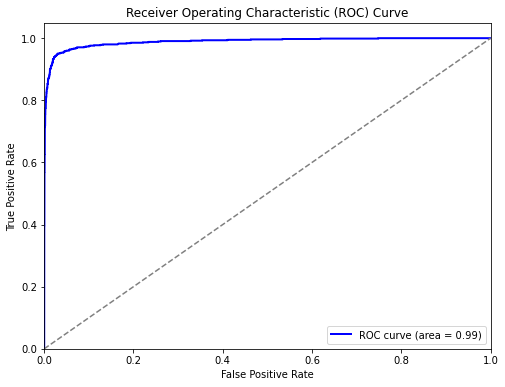

In [23]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
